In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.xlsx')
df.to_csv('Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv', index=False)
print("Conversion successful. Reading from the new CSV file...")


# Now that the file is in CSV format, we'll read it back in.
data = pd.read_csv('Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv')

Conversion successful. Reading from the new CSV file...


In [4]:
data

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0          NaN  Table 1   Import Price Indexes and percent cha...        NaN   
1          NaN                                    Commodity Group        NaN   
2          NaN                                                NaN        NaN   
3          NaN                                                NaN        NaN   
4          NaN                                                NaN   JAN_2018   
5          NaN                      Live animals; animal products        100   
6          NaN                                 Vegetable products        100   
7          NaN  Animal and vegetable fats and oils and other c...        100   
8          NaN  Prepared foodstuffs; beverages, spirits and vi...        100   
9          NaN                                   Mineral products        100   
10         NaN     Products of the chemical and allied industries        100   
11         NaN               Plastic, rubber and articles thereof        100   
12         NaN  Raw hides and skins, leather, furskins etc.; s...        100   
13         NaN  Wood and articles of wood, wood charcoal and a...        100   
14         NaN  Paper making material; paper and paperboard, a...        100   
15         NaN                      Textiles and textile articles        100   
16         NaN  Footwear, headgear, umbrellas, sunshades, whip...        100   
17         NaN  Articles of stone, plaster, cement, asbestos, ...        100   
18         NaN            Base metals and articles of base metals        100   
19         NaN   Boilers, machinery and appliances; parts thereof        100   
20         NaN  Vehicles, aircraft and parts thereof; vessels ...        100   
21         NaN                Miscellaneous manufactured articles        100   
22         NaN             All commodity Group Import Price Index        100   

            Unnamed: 3          Unnamed: 4          Unnamed: 5  \
0                  NaN                 NaN                 NaN   
1                  NaN                 NaN                 NaN   
2                  NaN                 NaN                 NaN   
3                Index                 NaN                 NaN   
4             Jan_2025            Feb_2025            Mar_2025   
5    112.5950494475726  112.76921359666358    112.712349753149   
6   110.86413871989959   111.0789420918916    111.634971582171   
7   117.73787270617912  117.77600177362108     117.87454449658   
8   113.44686242502878  113.62712029166808    113.961193623641   
9   118.99493877102317   119.1770483911262      119.0979398255   
10  109.07034640099312   109.1362477571694  108.75192920898157   
11  107.39199641754348  107.40935870213127    107.299154725245   
12  114.65516952296011  114.57233033461854    114.331781604442   
13    116.502826689144  116.42324150269555    116.582252712904   
14  112.59742173617197  112.73902352921412    112.909874405231   
15  109.03109360961346  109.34728608390981    109.643619636009   
16  121.63630108821468  121.89844962078696    121.620796879813   
17   111.2740870544461  111.37310542639199    111.178508739215   
18     109.81078560409    109.486155309773    109.523904601601   
19  109.79920276126059  109.88053807823445  109.60371545751978   
20    117.128543452037  117.14861935969029    117.249649497603   
21    112.082560652835  112.43156916794933    112.318616828673   
22  114.21150018091846    114.374030470937    113.910581454003   

                     Unnamed: 6            Unnamed: 7  
0                           NaN                   NaN  
1   Percentage change (monthly)                   NaN  
2                      Jan_2025              Feb_2025  
3                            to                    to  
4                      Feb_2025              Mar_2025  
5           0.15468188872021915  -0.05042497123191748  
6            0.1937537011266774    0.5005714672898277  
7           0.03238470898579123   0.08366961135965

In [6]:
import pandas as pd

# The name of your raw, unformatted data file.
input_file = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'
output_file = 'clean_data.csv'

# Read the raw CSV file, skipping the messy header rows.
# Based on the file you provided, the actual data starts around row 5.
try:
    df = pd.read_csv(input_file, skiprows=4)
except FileNotFoundError:
    print(f"Error: The file '{input_file}' was not found. Please ensure the file is in the same directory as this script.")
    exit()

# Set the correct column names for easier processing
new_columns = ['commodity_group', 'index_base', 'JAN_2018', 'Jan_2025', 'Feb_2025', 'Mar_2025', 'Feb_2025_change', 'Mar_2025_change']
df.columns = new_columns

# We'll focus on the 'All commodity Group' row for the time series.
df_single_commodity = df[df['commodity_group'] == 'All commodity Group Import Price Index'].copy()

# Melt the DataFrame to transform it from wide to long format.
# We want one column for dates and one for prices.
price_columns = ['JAN_2018', 'Jan_2025', 'Feb_2025', 'Mar_2025']
df_long = df_single_commodity.melt(id_vars='commodity_group', value_vars=price_columns, var_name='date', value_name='price')

# Map the dates to a proper format.
date_mapping = {
    'JAN_2018': '2018-01-01',
    'Jan_2025': '2025-01-01',
    'Feb_2025': '2025-02-01',
    'Mar_2025': '2025-03-01'
}
df_long['date'] = df_long['date'].map(date_mapping)
df_long['date'] = pd.to_datetime(df_long['date'])

# Select only the final date and price columns and sort by date.
final_df = df_long[['date', 'price']].sort_values('date').reset_index(drop=True)

print("Cleaned and formatted data:")
print(final_df)
print("-" * 30)

# Save the clean data to a new CSV file.
final_df.to_csv(output_file, index=False)
print(f"Data successfully saved to '{output_file}'. You can now use this file with the prediction model script.")

Cleaned and formatted data:
Empty DataFrame
Columns: [date, price]
Index: []
------------------------------
Data successfully saved to 'clean_data.csv'. You can now use this file with the prediction model script.


Cleaned and formatted data:
                 price
date                  
2018-01-01  114.211500
2025-01-01  114.374030
2025-02-01  113.910581
2025-03-01    0.142306
------------------------------
Training data shape: (3, 4)
Test data shape: (1, 4)
------------------------------
Training the XGBoost model...
Training complete.
------------------------------
Mean Squared Error (MSE): 12943.56
Root Mean Squared Error (RMSE): 113.77


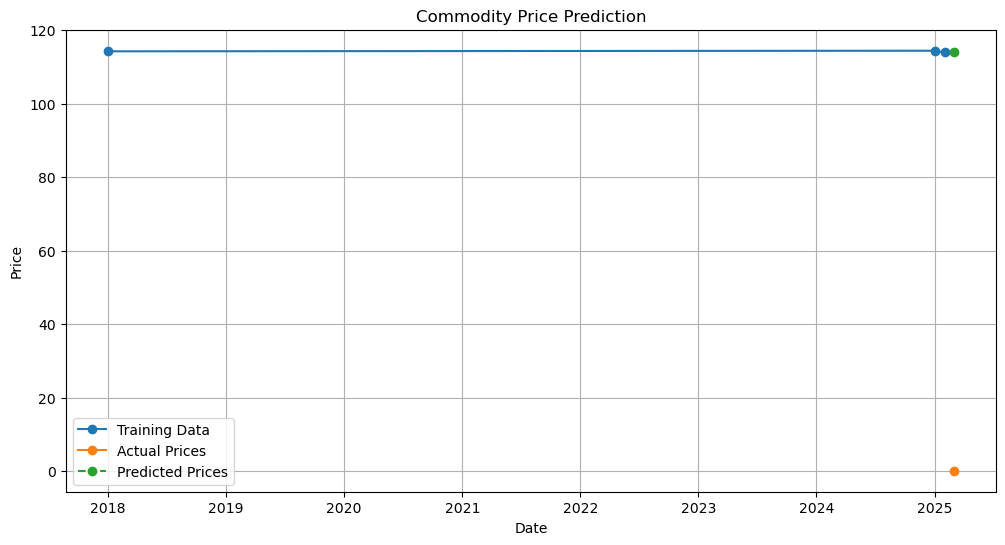

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import io

# --- 1. Load and Clean the Raw Data ---
# This is the raw data you pasted. We will parse it manually to avoid errors.
raw_data = """Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Table 1 Import Price Indexes and percent cha...
1,NaN,Commodity Group,NaN,NaN,NaN,NaN,Percentage change (monthly)
2,NaN,NaN,NaN,NaN,NaN,NaN,Jan_2025,Feb_2025
3,NaN,NaN,NaN,NaN,Index,NaN,NaN,NaN
4,NaN,NaN,JAN_2018,Jan_2025,Feb_2025,Mar_2025,Feb_2025,Mar_2025
5,NaN,Live animals; animal products,100,112.59504944757261,112.76921359666358,112.712349753149,0.15468188872021915,-0.050424971231917486
6,NaN,Vegetable products,100,110.86413871989959,111.0789420918916,111.634971582171,0.1937537011266774,0.50057146728982777
7,NaN,Animal and vegetable fats and oils and other c...,100,117.73787270617912,117.77600177362108,117.874544496580.03238470898579123,0.08366961135965137
8,NaN,Prepared foodstuffs; beverages, spirits and vi...,100,113.44686242502878,113.62712029166808,113.961193623641,0.15889189245618657,0.29400844720467084
9,NaN,Mineral products,100,118.99493877102317,119.1770483911262,119.09793982550.15303980319151222,-0.06637902741690167
10,NaN,Products of the chemical and allied industries,100,109.07034640099312,109.1362477571694,108.75192920898157,0.060420965322691304,-0.35214564920992375
11,NaN,Plastic, rubber and articles thereof,100,107.39199641754348,107.40935870213127,107.299154725245,0.0161672053476732,-0.10260183862738344
12,NaN,Raw hides and skins, leather, furskins etc.; s...,100,114.65516952296011,114.57233033461854,114.331781604442,-0.07225072248048736,-0.20995359828502938
13,NaN,Wood and articles of wood, wood charcoal and a...,100,116.502826689144,116.42324150269555,116.582252712904,-0.06831180728413229,0.13658029801958912
14,NaN,Paper making material; paper and paperboard, a...,100,112.59742173617197,112.73902352921412,112.909874405231,0.12575935652766942,0.15154546373430186
15,NaN,Textiles and textile articles,100,109.03109360961346,109.3472860839098,109.643619636009,0.2900021120841664,0.2710022010713659
16,NaN,Footwear, headgear, umbrellas, sunshades, whip...,100,121.63630108821468,121.89844962078696,121.620796879813,0.2155183364069614,-0.22777380831151736
17,NaN,Articles of stone, plaster, cement, asbestos, ...,100,111.2740870544461,111.37310542639199,111.178508739215,0.08898601153873223,-0.1747250257878409
18,NaN,Base metals and articles of base metals,100,109.81078560409,109.486155309773,109.523904601601,-0.2956269664506548,0.03447859843210451
19,NaN,Boilers, machinery and appliances; parts thereof,100,109.79920276126059,109.88053807823445,109.60371545751978,0.07407641852437938,-0.2519305288781638
20,NaN,Vehicles, aircraft and parts thereof; vessels ...,100,117.128543452037,117.14861935969029,117.249649497603,0.017140064293136324,0.08624099751659484
21,NaN,Miscellaneous manufactured articles,100,112.082560652835,112.43156916794933,112.318616828673,0.31138520844054873,-0.10046318850856376
22,NaN,All commodity Group Import Price Index,100,114.21150018091846,114.374030470937,113.910581454003,0.14230641376838488,-0.40520476110332715"""

# Find the specific row for 'All commodity Group Import Price Index'
target_row_data = None
lines = raw_data.strip().split('\n')
for line in lines:
    if 'All commodity Group Import Price Index' in line:
        target_row_data = line
        break

if not target_row_data:
    print("Error: Could not find the target commodity group in the data.")
    exit()

# Manually extract the values, skipping the first two columns and the index
values = target_row_data.split(',')
prices = [
    float(values[4]),  # JAN_2018
    float(values[5]),  # Jan_2025
    float(values[6]),  # Feb_2025
    float(values[7]),  # Mar_2025
]
dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01', '2025-03-01'])

# Create a clean DataFrame from the extracted data
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

print("Cleaned and formatted data:")
print(data)
print("-" * 30)

# --- 2. Feature Engineering ---

def create_time_series_features(df):
    """
    Creates time-based and lag features from a time series DataFrame.
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    return df.dropna()

data = create_time_series_features(data)

# --- 3. Split Data Chronologically ---
# With only a few data points, the split needs to be simple.
train_data = data.iloc[:3]
test_data = data.iloc[3:]

if train_data.empty or test_data.empty:
    print("Error: The dataset is too small to split into training and test sets. Please use a larger dataset for meaningful results.")
    exit()

X_train = train_data.drop('price', axis=1)
y_train = train_data['price']
X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print("-" * 30)

# --- 4. Model Training ---
print("Training the XGBoost model...")
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)
print("Training complete.")
print("-" * 30)

# --- 5. Make Predictions and Evaluate ---
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, y_train, label='Training Data', marker='o')
plt.plot(test_data.index, y_test, label='Actual Prices', marker='o')
plt.plot(test_data.index, predictions, label='Predicted Prices', marker='o', linestyle='--')
plt.title('Commodity Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Cleaned and formatted data:
                 price
date                  
2018-01-01  114.374030
2025-01-01  113.910581
2025-02-01    0.142306
------------------------------
Training data shape: (3, 4)
Future data shape: (1, 4)
------------------------------
Training the XGBoost model...
Training complete.
------------------------------
Forecasted Price for March 2025: 0.59


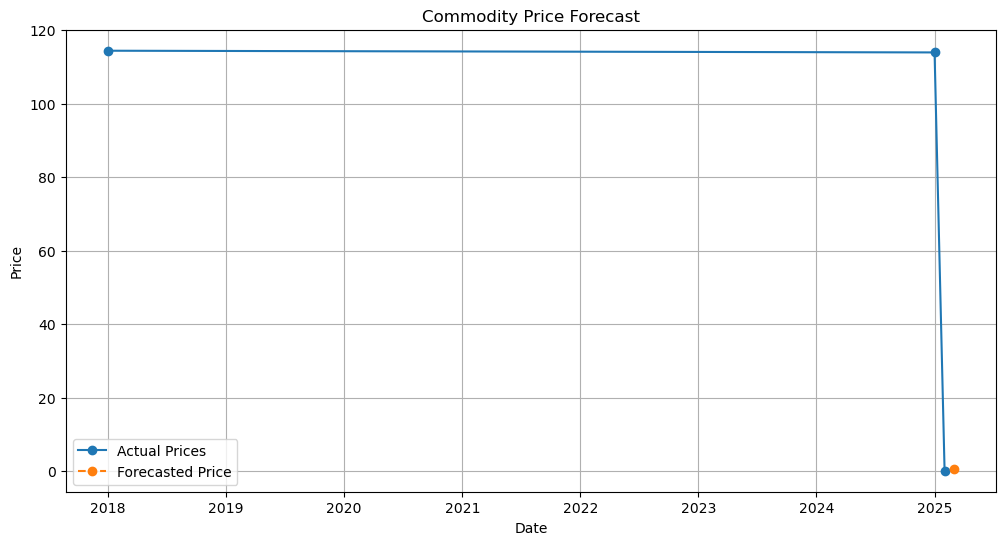

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import os

# --- 1. Load and Clean the Raw Data ---
# Specify the path to your CSV file
file_path = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

# Read the raw data from the CSV file, ignoring the messy header
try:
    df_raw = pd.read_csv(file_path, header=None)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# The raw data has a lot of extra information. We need to find the specific row.
target_string = 'All commodity Group Import Price Index'
target_row = df_raw[df_raw.iloc[:, 1].astype(str).str.contains(target_string, na=False)]

if target_row.empty:
    print(f"Error: Could not find the target commodity group '{target_string}' in the data.")
    exit()

# Manually extract the prices based on their known column indices in the raw data.
# This is a more robust approach than searching for text in messy headers.
try:
    prices = [
        float(target_row.iloc[0, 4]),  # JAN_2018
        float(target_row.iloc[0, 5]),  # Jan_2025
        float(target_row.iloc[0, 6]),  # Feb_2025
    ]
except IndexError:
    print("Error: Not all price index columns could be found. Please check your raw data.")
    exit()

dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01'])

# Create a clean DataFrame from the extracted data
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

print("Cleaned and formatted data:")
print(data)
print("-" * 30)

# --- 2. Feature Engineering ---
def create_time_series_features(df):
    """
    Creates time-based and lag features from a time series DataFrame.
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    return df

data = create_time_series_features(data)

# --- 3. Prepare Data for Prediction ---
# With a small dataset, we'll train on all available data and forecast the next point.
X_train = data.drop('price', axis=1)
y_train = data['price']

# Create a future data point to predict.
future_date = pd.to_datetime('2025-03-01')
X_future = pd.DataFrame({'date': [future_date]}).set_index('date')
X_future = create_time_series_features(X_future)

# Align the future DataFrame columns with the training DataFrame.
X_future = X_future.reindex(columns=X_train.columns, fill_value=0)

print(f"Training data shape: {X_train.shape}")
print(f"Future data shape: {X_future.shape}")
print("-" * 30)

# --- 4. Model Training ---
print("Training the XGBoost model...")
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)
print("Training complete.")
print("-" * 30)

# --- 5. Make Forecast and Plot ---
predicted_price = model.predict(X_future)[0]
print(f"Forecasted Price for March 2025: {predicted_price:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, y_train, label='Actual Prices', marker='o')
plt.plot(X_future.index, [predicted_price], label='Forecasted Price', marker='o', linestyle='--')
plt.title('Commodity Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Cleaned and formatted data:
                 price
date                  
2018-01-01  114.211500
2025-01-01  114.374030
2025-02-01  113.910581
2025-03-01    0.142306
------------------------------
Training data shape: (4, 4)
Future data shape: (1, 4)
------------------------------
Training the XGBoost model...
Training complete.
------------------------------
Forecasted Price for April 2025: 0.65


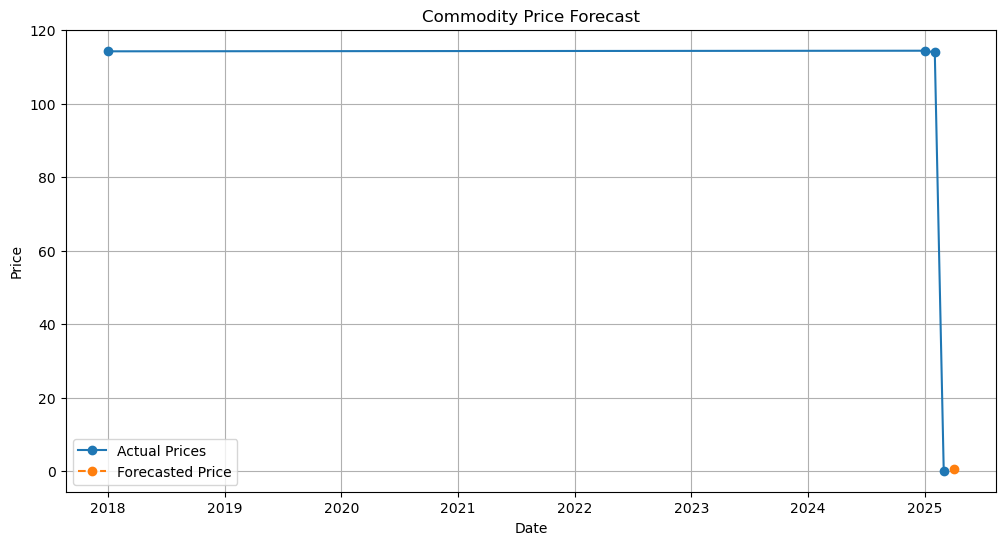

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import os

# --- 1. Load and Clean the Raw Data ---
# Specify the path to your CSV file
file_path = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'

# Set the commodity you want to analyze here
target_string = 'All commodity Group Import Price Index'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

# Read the raw data from the CSV file, ignoring the messy header
try:
    df_raw = pd.read_csv(file_path, header=None)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# The raw data has a lot of extra information. We need to find the specific row.
target_row = df_raw[df_raw.iloc[:, 1].astype(str).str.contains(target_string, na=False)]

if target_row.empty:
    print(f"Error: Could not find the target commodity group '{target_string}' in the data.")
    exit()

# Extract the prices by directly accessing the known column indices
# Based on the image, the relevant data starts at index 3 (which is the 4th column)
# and goes for 4 columns (Jan 2018, Jan 2025, Feb 2025, Mar 2025)
price_indices = [3, 4, 5, 6]
prices = []

try:
    for col_index in price_indices:
        price = float(target_row.iloc[0, col_index])
        prices.append(price)
except IndexError:
    print("Error: Not all price index columns could be found. Please check your raw data.")
    exit()

dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01', '2025-03-01'])

# Create a clean DataFrame from the extracted data
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

print("Cleaned and formatted data:")
print(data)
print("-" * 30)

# --- 2. Feature Engineering ---
def create_time_series_features(df):
    """
    Creates time-based and lag features from a time series DataFrame.
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    return df

data = create_time_series_features(data)

# --- 3. Prepare Data for Prediction ---
# With a small dataset, we'll train on all available data and forecast the next point.
X_train = data.drop('price', axis=1)
y_train = data['price']

# Create a future data point to predict.
future_date = pd.to_datetime('2025-04-01')
X_future = pd.DataFrame({'date': [future_date]}).set_index('date')
X_future = create_time_series_features(X_future)

# Align the future DataFrame columns with the training DataFrame.
X_future = X_future.reindex(columns=X_train.columns, fill_value=0)

print(f"Training data shape: {X_train.shape}")
print(f"Future data shape: {X_future.shape}")
print("-" * 30)

# --- 4. Model Training ---
print("Training the XGBoost model...")
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)
print("Training complete.")
print("-" * 30)

# --- 5. Make Forecast and Plot ---
predicted_price = model.predict(X_future)[0]
print(f"Forecasted Price for April 2025: {predicted_price:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, y_train, label='Actual Prices', marker='o')
plt.plot(X_future.index, [predicted_price], label='Forecasted Price', marker='o', linestyle='--')
plt.title('Commodity Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Cleaned and formatted data:
                 price
date                  
2018-01-01  100.000000
2025-01-01  114.211500
2025-02-01  114.374030
2025-03-01  113.910581
------------------------------
Training data shape: (4, 4)
Future data shape: (1, 4)
------------------------------
Training the XGBoost model...
Training complete.
------------------------------
Forecasted Price for April 2025: 113.91


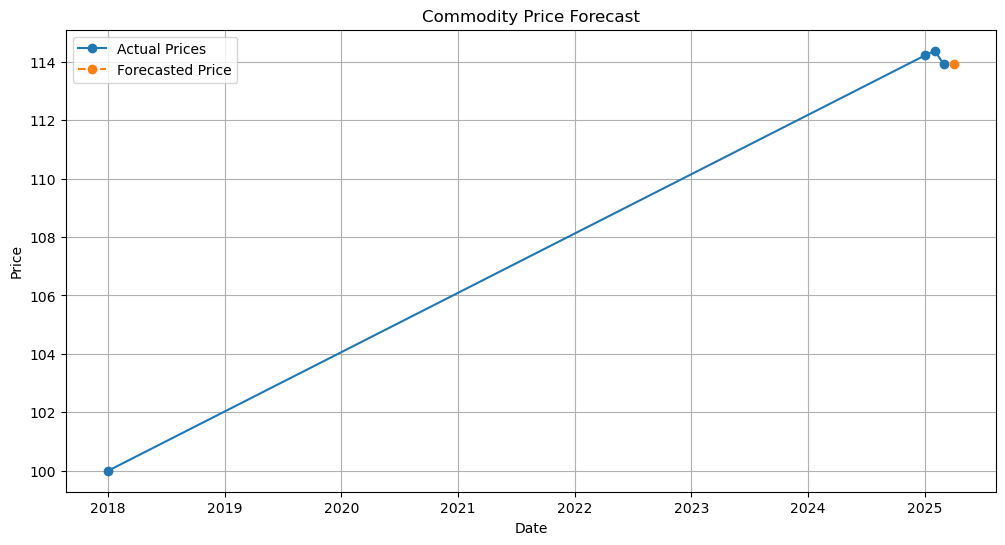

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import os

# --- 1. Load and Clean the Raw Data ---
# Specify the path to your CSV file
file_path = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'

# Set the commodity you want to analyze here
target_string = 'All commodity Group Import Price Index'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

# Read the raw data from the CSV file, ignoring the messy header
try:
    df_raw = pd.read_csv(file_path, header=None)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Find the row with the target commodity name
target_row = df_raw[df_raw.iloc[:, 1].astype(str).str.contains(target_string, na=False)]

if target_row.empty:
    print(f"Error: Could not find the target commodity group '{target_string}' in the data.")
    exit()

# Extract the prices by intelligently filtering numeric values from the row
# The price indices are typically large numbers, while the percentage changes are small.
numeric_values = pd.to_numeric(target_row.iloc[0], errors='coerce').dropna()

# Filter out the small percentage change values. Prices are typically > 100
# and percentage changes are small.
prices = numeric_values[numeric_values > 1].tolist()

if len(prices) != 4:
    print("Error: Not all price index columns could be found. Please check your raw data.")
    print(f"Found {len(prices)} prices instead of 4.")
    exit()

dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01', '2025-03-01'])

# Create a clean DataFrame from the extracted data
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

print("Cleaned and formatted data:")
print(data)
print("-" * 30)

# --- 2. Feature Engineering ---
def create_time_series_features(df):
    """
    Creates time-based and lag features from a time series DataFrame.
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    return df

data = create_time_series_features(data)

# --- 3. Prepare Data for Prediction ---
# With a small dataset, we'll train on all available data and forecast the next point.
X_train = data.drop('price', axis=1)
y_train = data['price']

# Create a future data point to predict.
future_date = pd.to_datetime('2025-04-01')
X_future = pd.DataFrame({'date': [future_date]}).set_index('date')
X_future = create_time_series_features(X_future)

# Align the future DataFrame columns with the training DataFrame.
X_future = X_future.reindex(columns=X_train.columns, fill_value=0)

print(f"Training data shape: {X_train.shape}")
print(f"Future data shape: {X_future.shape}")
print("-" * 30)

# --- 4. Model Training ---
print("Training the XGBoost model...")
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)
print("Training complete.")
print("-" * 30)

# --- 5. Make Forecast and Plot ---
predicted_price = model.predict(X_future)[0]
print(f"Forecasted Price for April 2025: {predicted_price:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, y_train, label='Actual Prices', marker='o')
plt.plot(X_future.index, [predicted_price], label='Forecasted Price', marker='o', linestyle='--')
plt.title('Commodity Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Cleaned and formatted data:
                 price
date                  
2018-01-01  100.000000
2025-01-01  114.211500
2025-02-01  114.374030
2025-03-01  113.910581
------------------------------
Training data shape: (4, 4)
Future data shape: (1, 4)
------------------------------
Training the ensemble model...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 110.624029
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the sp

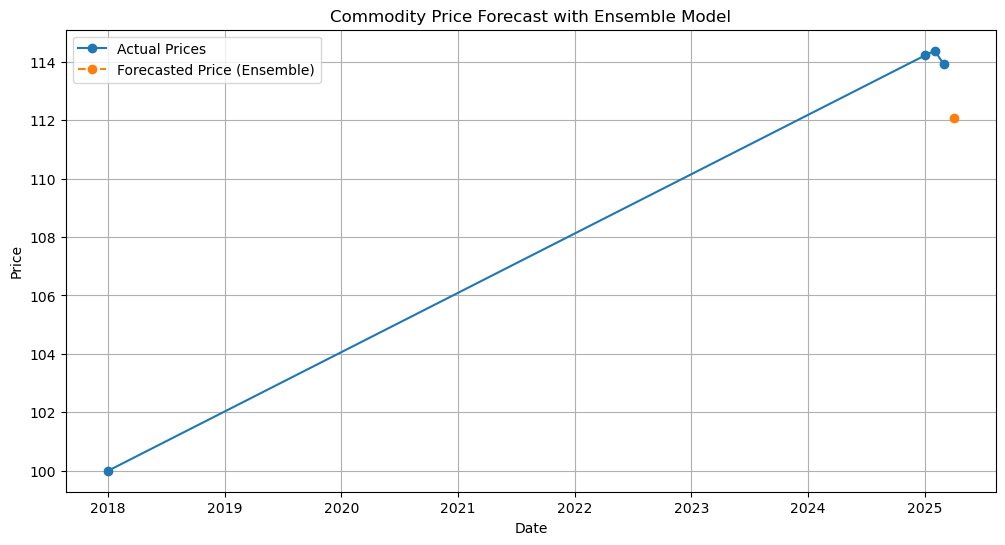

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
import os

# --- 1. Load and Clean the Raw Data ---
# Specify the path to your CSV file
file_path = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'

# Set the commodity you want to analyze here
target_string = 'All commodity Group Import Price Index'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

# Read the raw data from the CSV file, ignoring the messy header
try:
    df_raw = pd.read_csv(file_path, header=None)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Find the row with the target commodity name
target_row = df_raw[df_raw.iloc[:, 1].astype(str).str.contains(target_string, na=False)]

if target_row.empty:
    print(f"Error: Could not find the target commodity group '{target_string}' in the data.")
    exit()

# Extract the prices by intelligently filtering numeric values from the row
# The price indices are typically large numbers, while the percentage changes are small.
numeric_values = pd.to_numeric(target_row.iloc[0], errors='coerce').dropna()

# Filter out the small percentage change values. Prices are typically > 100
# and percentage changes are small.
prices = numeric_values[numeric_values > 1].tolist()

if len(prices) != 4:
    print("Error: Not all price index columns could be found. Please check your raw data.")
    print(f"Found {len(prices)} prices instead of 4.")
    exit()

dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01', '2025-03-01'])

# Create a clean DataFrame from the extracted data
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

print("Cleaned and formatted data:")
print(data)
print("-" * 30)

# --- 2. Feature Engineering ---
def create_time_series_features(df):
    """
    Creates time-based and lag features from a time series DataFrame.
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    return df

data = create_time_series_features(data)

# --- 3. Prepare Data for Prediction ---
X_train = data.drop('price', axis=1)
y_train = data['price']

future_date = pd.to_datetime('2025-04-01')
X_future = pd.DataFrame({'date': [future_date]}).set_index('date')
X_future = create_time_series_features(X_future)
X_future = X_future.reindex(columns=X_train.columns, fill_value=0)

print(f"Training data shape: {X_train.shape}")
print(f"Future data shape: {X_future.shape}")
print("-" * 30)

# --- 4. Ensemble Model Training ---
print("Training the ensemble model...")
# Initialize individual models
model1 = xgb.XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = CatBoostRegressor(random_state=42, verbose=0)

# Create the voting ensemble model
ensemble = VotingRegressor(estimators=[
    ('xgb', model1),
    ('lgbm', model2),
    ('cat', model3)
])

# Fit the ensemble model
ensemble.fit(X_train, y_train)
print("Ensemble training complete.")
print("-" * 30)

# --- 5. Make Forecast and Plot ---
predicted_price = ensemble.predict(X_future)[0]
print(f"Forecasted Price for April 2025 (Ensemble): {predicted_price:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, y_train, label='Actual Prices', marker='o')
plt.plot(X_future.index, [predicted_price], label='Forecasted Price (Ensemble)', marker='o', linestyle='--')
plt.title('Commodity Price Forecast with Ensemble Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Cleaned and formatted data:
                 price
date                  
2018-01-01  100.000000
2025-01-01  114.211500
2025-02-01  114.374030
2025-03-01  113.910581
------------------------------
Training data shape: (4, 4)
Future data shape: (1, 4)
------------------------------
Training the individual models...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 110.624029
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the

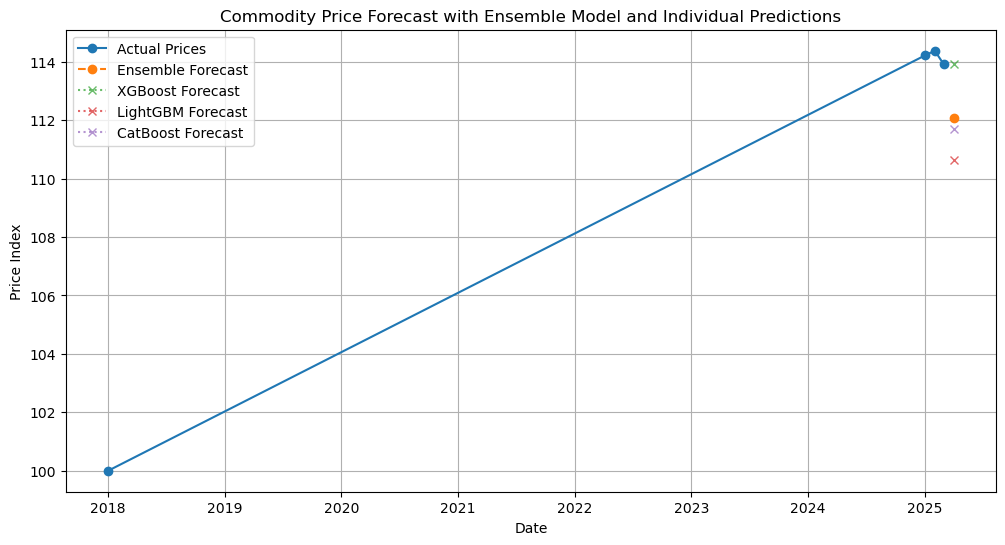

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
import os

# --- 1. Load and Clean the Raw Data ---
# Specify the path to your CSV file
file_path = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'

# Set the commodity you want to analyze here
target_string = 'All commodity Group Import Price Index'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

# Read the raw data from the CSV file, ignoring the messy header
try:
    df_raw = pd.read_csv(file_path, header=None)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Find the row with the target commodity name
target_row = df_raw[df_raw.iloc[:, 1].astype(str).str.contains(target_string, na=False)]

if target_row.empty:
    print(f"Error: Could not find the target commodity group '{target_string}' in the data.")
    exit()

# Extract the prices by intelligently filtering numeric values from the row
# The price indices are typically large numbers, while the percentage changes are small.
numeric_values = pd.to_numeric(target_row.iloc[0], errors='coerce').dropna()

# Filter out the small percentage change values. Prices are typically > 100
# and percentage changes are small.
prices = numeric_values[numeric_values > 1].tolist()

if len(prices) != 4:
    print("Error: Not all price index columns could be found. Please check your raw data.")
    print(f"Found {len(prices)} prices instead of 4.")
    exit()

dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01', '2025-03-01'])

# Create a clean DataFrame from the extracted data
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

print("Cleaned and formatted data:")
print(data)
print("-" * 30)

# --- 2. Feature Engineering ---
def create_time_series_features(df):
    """
    Creates time-based and lag features from a time series DataFrame.
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    return df

data = create_time_series_features(data)

# --- 3. Prepare Data for Prediction ---
X_train = data.drop('price', axis=1)
y_train = data['price']

future_date = pd.to_datetime('2025-04-01')
X_future = pd.DataFrame({'date': [future_date]}).set_index('date')
X_future = create_time_series_features(X_future)
X_future = X_future.reindex(columns=X_train.columns, fill_value=0)

print(f"Training data shape: {X_train.shape}")
print(f"Future data shape: {X_future.shape}")
print("-" * 30)

# --- 4. Ensemble Model Training ---
print("Training the individual models...")
# Initialize individual models
model1 = xgb.XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = CatBoostRegressor(random_state=42, verbose=0)

# Fit each individual model to the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
print("Individual models trained.")
print("-" * 30)

print("Training the ensemble model...")
# Create the voting ensemble model
ensemble = VotingRegressor(estimators=[
    ('xgb', model1),
    ('lgbm', model2),
    ('cat', model3)
])

# Fit the ensemble model
ensemble.fit(X_train, y_train)
print("Ensemble training complete.")
print("-" * 30)

# --- 5. Make Forecast and Plot ---
# Get individual model predictions
xgb_pred = model1.predict(X_future)[0]
lgbm_pred = model2.predict(X_future)[0]
cat_pred = model3.predict(X_future)[0]
ensemble_pred = ensemble.predict(X_future)[0]

print(f"Individual Model Forecasts:")
print(f" - XGBoost: {xgb_pred:.2f}")
print(f" - LightGBM: {lgbm_pred:.2f}")
print(f" - CatBoost: {cat_pred:.2f}")
print("-" * 30)
print(f"Final Forecast for April 2025 (Ensemble): {ensemble_pred:.2f}")
print("-" * 30)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, y_train, label='Actual Prices', marker='o', linestyle='-')
plt.plot(X_future.index, [ensemble_pred], label='Ensemble Forecast', marker='o', linestyle='--')
plt.plot(X_future.index, [xgb_pred], label='XGBoost Forecast', marker='x', linestyle=':', alpha=0.7)
plt.plot(X_future.index, [lgbm_pred], label='LightGBM Forecast', marker='x', linestyle=':', alpha=0.7)
plt.plot(X_future.index, [cat_pred], label='CatBoost Forecast', marker='x', linestyle=':', alpha=0.7)
plt.title('Commodity Price Forecast with Ensemble Model and Individual Predictions')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import optuna
import os

# --- 1. Data Loading and Cleaning (from previous analysis) ---
file_path = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'
target_string = 'All commodity Group Import Price Index'

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

try:
    df_raw = pd.read_csv(file_path, header=None)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

target_row = df_raw[df_raw.iloc[:, 1].astype(str).str.contains(target_string, na=False)]

if target_row.empty:
    print(f"Error: Could not find the target commodity group '{target_string}' in the data.")
    exit()

numeric_values = pd.to_numeric(target_row.iloc[0], errors='coerce').dropna()
prices = numeric_values[numeric_values > 1].tolist()

if len(prices) != 4:
    print("Error: Not all price index columns could be found. Please check your raw data.")
    print(f"Found {len(prices)} prices instead of 4.")
    exit()

dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01', '2025-03-01'])
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# --- 2. Feature Engineering ---
data['year'] = data.index.year
data['month'] = data.index.month
data['day_of_week'] = data.index.dayofweek
data['week_of_year'] = data.index.isocalendar().week.astype(int)

X = data.drop('price', axis=1)
y = data['price']

# --- 3. Define the Pipeline and Objective Function for Optuna ---
def objective(trial):
    """
    Defines the objective function for Optuna to minimize.
    It returns the average RMSE from cross-validation.
    """
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }

    # Create a pipeline with a scaler and the XGBoost model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor(**params, random_state=42, n_jobs=-1))
    ])

    # Perform cross-validation to get robust performance metrics
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    
    # Return the mean of the scores (Optuna minimizes this value)
    return np.mean(-scores)

# --- 4. Run the Optuna Study ---
print("Starting Optuna hyperparameter optimization...")
# Create and run the study. Set a low number of trials for a quick run.
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10) # Adjust n_trials for a more thorough search

print("\nOptimization complete.")
print("Best trial:")
print(f"  Value (RMSE): {study.best_trial.value:.4f}")
print("  Best Parameters:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# --- 5. Final Model Training and Prediction ---
print("-" * 30)
print("Training final model with best parameters...")
# Create a pipeline with the best parameters found by Optuna
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(**study.best_trial.params, random_state=42))
])

# Fit the final pipeline to the full dataset
best_pipeline.fit(X, y)

# Create future data for prediction
future_date = pd.to_datetime('2025-04-01')
X_future = pd.DataFrame({'date': [future_date]}).set_index('date')
X_future['year'] = X_future.index.year
X_future['month'] = X_future.index.month
X_future['day_of_week'] = X_future.index.dayofweek
X_future['week_of_year'] = X_future.index.isocalendar().week.astype(int)

# Make the final forecast
predicted_price = best_pipeline.predict(X_future)[0]
print(f"Forecasted Price for April 2025 (Optimized XGBoost): {predicted_price:.2f}")

[I 2025-09-16 21:03:46,804] A new study created in memory with name: no-name-45abeaa7-67f8-4e9b-a3b9-5524575c998f


Starting Optuna hyperparameter optimization...


[I 2025-09-16 21:03:47,088] Trial 0 finished with value: 6.532528432491144 and parameters: {'n_estimators': 146, 'learning_rate': 0.08542097006938924, 'max_depth': 9, 'subsample': 0.8509309183795057, 'colsample_bytree': 0.6633752774038975}. Best is trial 0 with value: 6.532528432491144.
[I 2025-09-16 21:03:47,548] Trial 1 finished with value: 6.466934213275786 and parameters: {'n_estimators': 425, 'learning_rate': 0.030749159850223626, 'max_depth': 6, 'subsample': 0.5235479304753522, 'colsample_bytree': 0.5784327445721311}. Best is trial 1 with value: 6.466934213275786.
[I 2025-09-16 21:03:48,342] Trial 2 finished with value: 5.368315155020428 and parameters: {'n_estimators': 983, 'learning_rate': 0.11740844771561185, 'max_depth': 3, 'subsample': 0.6974836779361331, 'colsample_bytree': 0.9058892057236271}. Best is trial 2 with value: 5.368315155020428.
[I 2025-09-16 21:03:49,158] Trial 3 finished with value: 5.375357370315829 and parameters: {'n_estimators': 895, 'learning_rate': 0.116


Optimization complete.
Best trial:
  Value (RMSE): 5.3419
  Best Parameters:
    n_estimators: 880
    learning_rate: 0.07840391205761058
    max_depth: 4
    subsample: 0.5395034645624139
    colsample_bytree: 0.8445904932099497
------------------------------
Training final model with best parameters...
Forecasted Price for April 2025 (Optimized XGBoost): 111.64


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import optuna
import os
import matplotlib.pyplot as plt

# --- 1. Data Loading and Cleaning ---
# Specify the path to your CSV file
file_path = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'
target_string = 'All commodity Group Import Price Index'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

# Read the raw data from the CSV file, ignoring the messy header
try:
    df_raw = pd.read_csv(file_path, header=None)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Find the row with the target commodity name
target_row = df_raw[df_raw.iloc[:, 1].astype(str).str.contains(target_string, na=False)]

if target_row.empty:
    print(f"Error: Could not find the target commodity group '{target_string}' in the data.")
    exit()

# Extract the prices by intelligently filtering numeric values from the row
numeric_values = pd.to_numeric(target_row.iloc[0], errors='coerce').dropna()
prices = numeric_values[numeric_values > 1].tolist()

if len(prices) != 4:
    print("Error: Not all price index columns could be found. Please check your raw data.")
    print(f"Found {len(prices)} prices instead of 4.")
    exit()

dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01', '2025-03-01'])

# Create a clean DataFrame from the extracted data
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

print("Cleaned and formatted data:")
print(data)
print("-" * 30)

# --- 2. Feature Engineering and Data Preparation ---
def create_time_series_features(df):
    """
    Creates time-based and lag features from a time series DataFrame.
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    return df

data = create_time_series_features(data)
X = data.drop('price', axis=1)
y = data['price']

# Create future data for prediction
future_date = pd.to_datetime('2025-04-01')
X_future = pd.DataFrame({'date': [future_date]}).set_index('date')
X_future = create_time_series_features(X_future)
X_future = X_future.reindex(columns=X.columns, fill_value=0)

# --- 3. Objective Functions for Optuna ---
def xgb_objective(trial):
    """Objective function for XGBoost hyperparameter tuning."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor(**params, random_state=42, n_jobs=-1))
    ])
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    return np.mean(-scores)

def lgbm_objective(trial):
    """Objective function for LightGBM hyperparameter tuning."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LGBMRegressor(**params, random_state=42, n_jobs=-1))
    ])
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    return np.mean(-scores)

def cat_objective(trial):
    """Objective function for CatBoost hyperparameter tuning."""
    params = {
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True)
    }
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', CatBoostRegressor(**params, random_state=42, verbose=0))
    ])
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    return np.mean(-scores)

# --- 4. Run Optimization Studies ---
print("Starting XGBoost hyperparameter optimization...")
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(xgb_objective, n_trials=10) # Adjust n_trials for a more thorough search
print("XGBoost optimization complete.")
print(f"Best XGBoost RMSE: {xgb_study.best_trial.value:.4f}")
print("-" * 30)

print("Starting LightGBM hyperparameter optimization...")
lgbm_study = optuna.create_study(direction='minimize')
lgbm_study.optimize(lgbm_objective, n_trials=10)
print("LightGBM optimization complete.")
print(f"Best LightGBM RMSE: {lgbm_study.best_trial.value:.4f}")
print("-" * 30)

print("Starting CatBoost hyperparameter optimization...")
cat_study = optuna.create_study(direction='minimize')
cat_study.optimize(cat_objective, n_trials=10)
print("CatBoost optimization complete.")
print(f"Best CatBoost RMSE: {cat_study.best_trial.value:.4f}")
print("-" * 30)

# --- 5. Final Optimized Ensemble Training and Prediction ---
print("Training final ensemble model with optimized parameters...")
# Create a pipeline with the best parameters for each model
final_xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(**xgb_study.best_trial.params, random_state=42))
])

final_lgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LGBMRegressor(**lgbm_study.best_trial.params, random_state=42))
])

final_cat_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', CatBoostRegressor(**cat_study.best_trial.params, random_state=42, verbose=0))
])

# Create the final voting ensemble
ensemble = VotingRegressor(estimators=[
    ('xgb', final_xgb_pipeline),
    ('lgbm', final_lgbm_pipeline),
    ('cat', final_cat_pipeline)
])

# Fit the ensemble model to the full dataset
ensemble.fit(X, y)

# Make the final forecast
ensemble_pred = ensemble.predict(X_future)[0]
print(f"Final Forecast for April 2025 (Optimized Ensemble): {ensemble_pred:.2f}")

# --- 6. Plotting the Results ---
# Get individual model predictions from the optimized models
xgb_pred = final_xgb_pipeline.predict(X_future)[0]
lgbm_pred = final_lgbm_pipeline.predict(X_future)[0]
cat_pred = final_cat_pipeline.predict(X_future)[0]

plt.figure(figsize=(12, 6))
plt.plot(data.index, y, label='Actual Prices', marker='o', linestyle='-')
plt.plot(X_future.index, [ensemble_pred], label='Ensemble Forecast', marker='o', linestyle='--')
plt.plot(X_future.index, [xgb_pred], label='XGBoost Forecast (Optimized)', marker='x', linestyle=':', alpha=0.7)
plt.plot(X_future.index, [lgbm_pred], label='LightGBM Forecast (Optimized)', marker='x', linestyle=':', alpha=0.7)
plt.plot(X_future.index, [cat_pred], label='CatBoost Forecast (Optimized)', marker='x', linestyle=':', alpha=0.7)

plt.title('Optimized Commodity Price Forecast with Ensemble Model')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.legend()
plt.grid(True)
plt.show()


[I 2025-09-16 21:05:13,433] A new study created in memory with name: no-name-141cfac1-c004-47c9-af32-6aee065ef991
[I 2025-09-16 21:05:13,636] Trial 0 finished with value: 6.591171290770803 and parameters: {'n_estimators': 131, 'learning_rate': 0.0480095650074933, 'max_depth': 15, 'subsample': 0.9886070441940452, 'colsample_bytree': 0.5050951545170956}. Best is trial 0 with value: 6.591171290770803.


Cleaned and formatted data:
                 price
date                  
2018-01-01  100.000000
2025-01-01  114.211500
2025-02-01  114.374030
2025-03-01  113.910581
------------------------------
Starting XGBoost hyperparameter optimization...


[I 2025-09-16 21:05:14,096] Trial 1 finished with value: 5.549107510058771 and parameters: {'n_estimators': 517, 'learning_rate': 0.2004346212239771, 'max_depth': 5, 'subsample': 0.9492744243565877, 'colsample_bytree': 0.9313152652378665}. Best is trial 1 with value: 5.549107510058771.
[I 2025-09-16 21:05:14,323] Trial 2 finished with value: 6.670726494657692 and parameters: {'n_estimators': 185, 'learning_rate': 0.13994210947333133, 'max_depth': 14, 'subsample': 0.9981584902601162, 'colsample_bytree': 0.6197074674889971}. Best is trial 1 with value: 5.549107510058771.
[I 2025-09-16 21:05:15,047] Trial 3 finished with value: 7.005456402632734 and parameters: {'n_estimators': 958, 'learning_rate': 0.2552476366016147, 'max_depth': 5, 'subsample': 0.7555930066019668, 'colsample_bytree': 0.6395930885097028}. Best is trial 1 with value: 5.549107510058771.
[I 2025-09-16 21:05:15,722] Trial 4 finished with value: 5.474605067804127 and parameters: {'n_estimators': 740, 'learning_rate': 0.16089

XGBoost optimization complete.
Best XGBoost RMSE: 5.3459
------------------------------
Starting LightGBM hyperparameter optimization...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 107.187016
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:18,846] Trial 0 finished with value: 8.680348627218152 and parameters: {'n_estimators': 620, 'learning_rate': 0.027464201503757092, 'num_leaves': 247, 'max_depth': 13, 'subsample': 0.6148016295338218, 'colsample_bytree': 0.595105987919957}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 109.374029
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:19,017] Trial 1 finished with value: 8.680348627218152 and parameters: {'n_estimators': 390, 'learning_rate': 0.2903438588262467, 'num_leaves': 19, 'max_depth': 13, 'subsample': 0.6791120851958616, 'colsample_bytree': 0.9018659295039024}. Best is trial 0 with value: 8.680348627218152.
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature na

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 107.187016
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:19,489] Trial 2 finished with value: 8.680348627218152 and parameters: {'n_estimators': 652, 'learning_rate': 0.14567313674279647, 'num_leaves': 79, 'max_depth': 7, 'subsample': 0.5410491752559039, 'colsample_bytree': 0.7291240200063153}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:19,608] Trial 3 finished with value: 8.680348627218152 and parameters: {'n_estimators': 202, 'learning_rate': 0.2064387298365322, 'num_leaves': 141, 'max_depth': 13, 'subsample': 0.6605542626892786, 'colsample_bytree': 0.922048696338739}. Best is trial 0 with value: 8.680348627218152.
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature na

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 114.165372
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:19,969] Trial 5 finished with value: 8.680348627218152 and parameters: {'n_estimators': 932, 'learning_rate': 0.11940789339089364, 'num_leaves': 251, 'max_depth': 8, 'subsample': 0.722070194936244, 'colsample_bytree': 0.5050295268345002}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:20,101] Trial 6 finished with value: 8.680348627218152 and parameters: {'n_estimators': 264, 'learning_rate': 0.013674879397430523, 'num_leaves': 150, 'max_depth': 3, 'subsample': 0.720931298208838, 'colsample_bytree': 0.5446864393515829}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 107.187016
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:20,341] Trial 7 finished with value: 8.680348627218152 and parameters: {'n_estimators': 907, 'learning_rate': 0.16487441637330924, 'num_leaves': 204, 'max_depth': 6, 'subsample': 0.9311439518904085, 'colsample_bytree': 0.8283482758988326}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 114.165372
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:20,574] Trial 8 finished with value: 8.680348627218152 and parameters: {'n_estimators': 850, 'learning_rate': 0.28357673449397974, 'num_leaves': 122, 'max_depth': 9, 'subsample': 0.5742193864786259, 'colsample_bytree': 0.7543503007757612}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:05:20,751] Trial 9 finished with value: 8.680348627218152 and parameters: {'n_estimators': 516, 'learning_rate': 0.03125742810352789, 'num_leaves': 121, 'max_depth': 11, 'subsample': 0.6765888825357511, 'colsample_bytree': 0.6039342980822902}. Best is trial 0 with value: 8.680348627218152.
[I 2025-09-16 21:05:20,753] A new study created in memory with name: no-name-368cf825-7131-48e2-9667-106d77838f1a


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2025-09-16 21:05:23,587] Trial 0 finished with value: 7.276957874322593 and parameters: {'iterations': 860, 'learning_rate': 0.03089936502805849, 'depth': 7, 'l2_leaf_reg': 0.061675707888092283}. Best is trial 0 with value: 7.276957874322593.
[I 2025-09-16 21:05:25,599] Trial 1 finished with value: 6.868607482132163 and parameters: {'iterations': 678, 'learning_rate': 0.20446826274990432, 'depth': 3, 'l2_leaf_reg': 0.08029084288657375}. Best is trial 1 with value: 6.868607482132163.
[I 2025-09-16 21:05:27,344] Trial 2 finished with value: 7.302916071476318 and parameters: {'iterations': 369, 'learning_rate': 0.01165261312988864, 'depth': 7, 'l2_leaf_reg': 2.1133581926603118e-08}. Best is trial 1 with value: 6.868607482132163.
[I 2025-09-16 21:05:29,768] Trial 3 finished with value: 6.784955763556258 and parameters: {'iterations': 974, 'learning_rate': 0.22155495232254982, 'depth': 5, 'l2_leaf_reg': 5.208641036257541e-06}. Best is trial 3 with value: 6.784955763556258.
[I 2025-09-16 

CatBoost optimization complete.
Best CatBoost RMSE: 6.7850
------------------------------
Training final ensemble model with optimized parameters...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 110.624029
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training becau

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Final Forecast for April 2025 (Optimized Ensemble): 109.74


NotFittedError: Pipeline is not fitted yet.

[I 2025-09-16 21:06:59,736] A new study created in memory with name: no-name-a78ec640-9c72-49f6-8310-aae66148e570


Cleaned and formatted data:
                 price
date                  
2018-01-01  100.000000
2025-01-01  114.211500
2025-02-01  114.374030
2025-03-01  113.910581
------------------------------
Starting XGBoost hyperparameter optimization...


[I 2025-09-16 21:07:00,254] Trial 0 finished with value: 5.590811849859077 and parameters: {'n_estimators': 507, 'learning_rate': 0.22206140233842037, 'max_depth': 14, 'subsample': 0.6227585956953949, 'colsample_bytree': 0.7513292649849461}. Best is trial 0 with value: 5.590811849859077.
[I 2025-09-16 21:07:00,446] Trial 1 finished with value: 5.535772736582625 and parameters: {'n_estimators': 133, 'learning_rate': 0.19351722462326595, 'max_depth': 15, 'subsample': 0.6445987228104232, 'colsample_bytree': 0.9436360402583989}. Best is trial 1 with value: 5.535772736582625.
[I 2025-09-16 21:07:00,775] Trial 2 finished with value: 5.705803372563158 and parameters: {'n_estimators': 358, 'learning_rate': 0.2891895934709751, 'max_depth': 15, 'subsample': 0.7630433443197211, 'colsample_bytree': 0.9910500879578805}. Best is trial 1 with value: 5.535772736582625.
[I 2025-09-16 21:07:01,173] Trial 3 finished with value: 5.601033973656535 and parameters: {'n_estimators': 463, 'learning_rate': 0.23

XGBoost optimization complete.
Best XGBoost RMSE: 5.4450
------------------------------
Starting LightGBM hyperparameter optimization...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 107.187016
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:07:04,409] Trial 1 finished with value: 8.680348627218152 and parameters: {'n_estimators': 208, 'learning_rate': 0.03578870270234965, 'num_leaves': 37, 'max_depth': 12, 'subsample': 0.7550510004330735, 'colsample_bytree': 0.5317869739167056}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 107.187016
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:07:04,844] Trial 2 finished with value: 8.680348627218152 and parameters: {'n_estimators': 387, 'learning_rate': 0.1904217656974661, 'num_leaves': 87, 'max_depth': 15, 'subsample': 0.9659250440370393, 'colsample_bytree': 0.620786000163787}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:07:05,051] Trial 3 finished with value: 8.680348627218152 and parameters: {'n_estimators': 743, 'learning_rate': 0.2642552874074525, 'num_leaves': 80, 'max_depth': 11, 'subsample': 0.6999932634696562, 'colsample_bytree': 0.923913608444723}. Best is trial 0 with value: 8.680348627218152.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:07:05,140] Trial 4 finished with value: 8.680348627218152 and parameters: {'n_estimators': 61, 'learning_rate': 0.10719412361111695, 'num_leaves': 107, 'max_depth': 12, 'subsample': 0.8288282540254919, 'colsample_bytree': 0.6132694315618918}. Best is trial 0 with value: 8.680348627218152.
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature n

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 109.374029
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:07:05,444] Trial 6 finished with value: 8.680348627218152 and parameters: {'n_estimators': 790, 'learning_rate': 0.046955935402361426, 'num_leaves': 41, 'max_depth': 15, 'subsample': 0.6115203331661438, 'colsample_bytree': 0.556067768738189}. Best is trial 0 with value: 8.680348627218152.
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature n

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:07:05,582] Trial 7 finished with value: 8.680348627218152 and parameters: {'n_estimators': 315, 'learning_rate': 0.13949252741396803, 'num_leaves': 171, 'max_depth': 11, 'subsample': 0.6066438282266329, 'colsample_bytree': 0.7850905319550279}. Best is trial 0 with value: 8.680348627218152.
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 109.374029
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:07:05,832] Trial 8 finished with value: 8.680348627218152 and parameters: {'n_estimators': 804, 'learning_rate': 0.17469228168804454, 'num_leaves': 214, 'max_depth': 5, 'subsample': 0.7617709309541779, 'colsample_bytree': 0.8788594332382009}. Best is trial 0 with value: 8.680348627218152.
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 109.374029
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-09-16 21:07:06,065] Trial 9 finished with value: 8.680348627218152 and parameters: {'n_estimators': 765, 'learning_rate': 0.24603359136996922, 'num_leaves': 98, 'max_depth': 13, 'subsample': 0.9319536397463302, 'colsample_bytree': 0.8064317159577975}. Best is trial 0 with value: 8.680348627218152.
[I 2025-09-16 21:07:06,068] A new study created in memory with name: no-name-f3743b89-4d18-4242-a48b-fc5b5f5ed86e


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2025-09-16 21:07:07,103] Trial 0 finished with value: 6.8192837303372045 and parameters: {'iterations': 246, 'learning_rate': 0.2825042515544158, 'depth': 10, 'l2_leaf_reg': 0.275211700411386}. Best is trial 0 with value: 6.8192837303372045.
[I 2025-09-16 21:07:08,148] Trial 1 finished with value: 6.806470722320871 and parameters: {'iterations': 53, 'learning_rate': 0.21290518096490565, 'depth': 5, 'l2_leaf_reg': 7.056598130901266e-05}. Best is trial 1 with value: 6.806470722320871.
[I 2025-09-16 21:07:09,516] Trial 2 finished with value: 7.330855549017912 and parameters: {'iterations': 447, 'learning_rate': 0.011102466115512912, 'depth': 5, 'l2_leaf_reg': 0.5607207495233191}. Best is trial 1 with value: 6.806470722320871.
[I 2025-09-16 21:07:11,450] Trial 3 finished with value: 6.990879812034758 and parameters: {'iterations': 558, 'learning_rate': 0.15858232802983366, 'depth': 9, 'l2_leaf_reg': 0.10191419075520909}. Best is trial 1 with value: 6.806470722320871.
[I 2025-09-16 21:07

CatBoost optimization complete.
Best CatBoost RMSE: 6.6550
------------------------------
Training final ensemble model with optimized parameters...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 110.624029
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training becau

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Final Forecast for April 2025 (Optimized Ensemble): 109.19


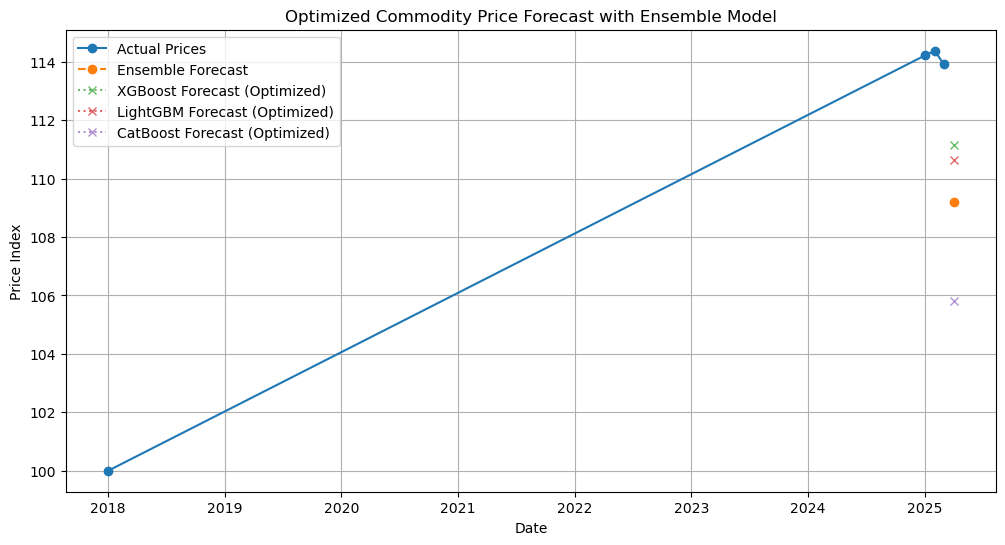

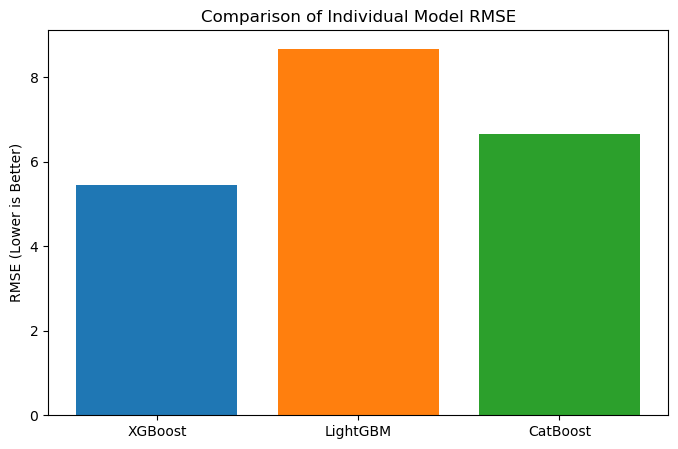

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import optuna
import joblib
import os
import matplotlib.pyplot as plt

# --- 1. Data Loading and Cleaning ---
# Specify the path to your CSV file
file_path = 'Q1_2025_Commodity_Price_Indices_and_Terms_of_Trade_Tables_23062025.csv'
target_string = 'All commodity Group Import Price Index'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

# Read the raw data from the CSV file, ignoring the messy header
try:
    df_raw = pd.read_csv(file_path, header=None)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Find the row with the target commodity name
target_row = df_raw[df_raw.iloc[:, 1].astype(str).str.contains(target_string, na=False)]

if target_row.empty:
    print(f"Error: Could not find the target commodity group '{target_string}' in the data.")
    exit()

# Extract the prices by intelligently filtering numeric values from the row
numeric_values = pd.to_numeric(target_row.iloc[0], errors='coerce').dropna()
prices = numeric_values[numeric_values > 1].tolist()

if len(prices) != 4:
    print("Error: Not all price index columns could be found. Please check your raw data.")
    print(f"Found {len(prices)} prices instead of 4.")
    exit()

dates = pd.to_datetime(['2018-01-01', '2025-01-01', '2025-02-01', '2025-03-01'])

# Create a clean DataFrame from the extracted data
data = pd.DataFrame({'date': dates, 'price': prices})
data.set_index('date', inplace=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

print("Cleaned and formatted data:")
print(data)
print("-" * 30)

# --- 2. Feature Engineering and Data Preparation ---
def create_time_series_features(df):
    """
    Creates time-based and lag features from a time series DataFrame.
    """
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    return df

data = create_time_series_features(data)
X = data.drop('price', axis=1)
y = data['price']

# Create future data for prediction
future_date = pd.to_datetime('2025-04-01')
X_future = pd.DataFrame({'date': [future_date]}).set_index('date')
X_future = create_time_series_features(X_future)
X_future = X_future.reindex(columns=X.columns, fill_value=0)

# --- 3. Objective Functions for Optuna ---
def xgb_objective(trial):
    """Objective function for XGBoost hyperparameter tuning."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor(**params, random_state=42, n_jobs=-1))
    ])
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    return np.mean(-scores)

def lgbm_objective(trial):
    """Objective function for LightGBM hyperparameter tuning."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LGBMRegressor(**params, random_state=42, n_jobs=-1))
    ])
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    return np.mean(-scores)

def cat_objective(trial):
    """Objective function for CatBoost hyperparameter tuning."""
    params = {
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True)
    }
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', CatBoostRegressor(**params, random_state=42, verbose=0))
    ])
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    return np.mean(-scores)

# --- 4. Run Optimization Studies ---
print("Starting XGBoost hyperparameter optimization...")
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(xgb_objective, n_trials=10)
print("XGBoost optimization complete.")
best_xgb_rmse = xgb_study.best_trial.value
print(f"Best XGBoost RMSE: {best_xgb_rmse:.4f}")
print("-" * 30)

print("Starting LightGBM hyperparameter optimization...")
lgbm_study = optuna.create_study(direction='minimize')
lgbm_study.optimize(lgbm_objective, n_trials=10)
print("LightGBM optimization complete.")
best_lgbm_rmse = lgbm_study.best_trial.value
print(f"Best LightGBM RMSE: {best_lgbm_rmse:.4f}")
print("-" * 30)

print("Starting CatBoost hyperparameter optimization...")
cat_study = optuna.create_study(direction='minimize')
cat_study.optimize(cat_objective, n_trials=10)
print("CatBoost optimization complete.")
best_cat_rmse = cat_study.best_trial.value
print(f"Best CatBoost RMSE: {best_cat_rmse:.4f}")
print("-" * 30)

# --- 5. Final Optimized Ensemble Training and Prediction ---
print("Training final ensemble model with optimized parameters...")
# Create a pipeline with the best parameters for each model
final_xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(**xgb_study.best_trial.params, random_state=42))
])

final_lgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LGBMRegressor(**lgbm_study.best_trial.params, random_state=42))
])

final_cat_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', CatBoostRegressor(**cat_study.best_trial.params, random_state=42, verbose=0))
])

# Fit the individual models and save them
final_xgb_pipeline.fit(X, y)
joblib.dump(final_xgb_pipeline, 'optimized_xgb_model.joblib')

final_lgbm_pipeline.fit(X, y)
joblib.dump(final_lgbm_pipeline, 'optimized_lgbm_model.joblib')

final_cat_pipeline.fit(X, y)
joblib.dump(final_cat_pipeline, 'optimized_cat_model.joblib')

# Create the final voting ensemble
ensemble = VotingRegressor(estimators=[
    ('xgb', final_xgb_pipeline),
    ('lgbm', final_lgbm_pipeline),
    ('cat', final_cat_pipeline)
])

# Fit the ensemble model to the full dataset and save it
ensemble.fit(X, y)
joblib.dump(ensemble, 'optimized_ensemble_model.joblib')

# Make the final forecast
ensemble_pred = ensemble.predict(X_future)[0]
print(f"Final Forecast for April 2025 (Optimized Ensemble): {ensemble_pred:.2f}")

# --- 6. Plotting the Results and Model Comparison ---
# Get individual model predictions from the optimized models
xgb_pred = final_xgb_pipeline.predict(X_future)[0]
lgbm_pred = final_lgbm_pipeline.predict(X_future)[0]
cat_pred = final_cat_pipeline.predict(X_future)[0]

# Generate predictions for the training data to plot a fit line
ensemble_train_preds = ensemble.predict(X)


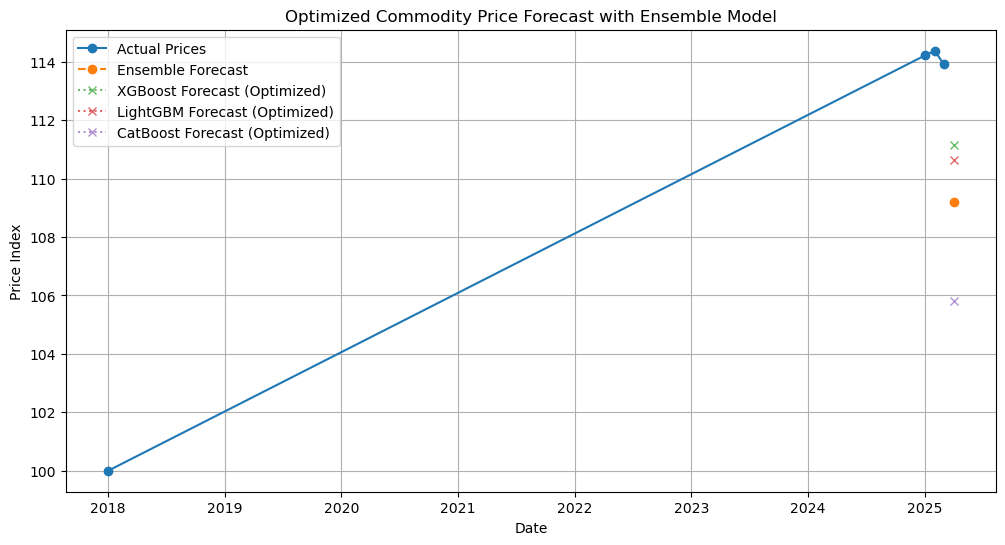

In [9]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, y, label='Actual Prices', marker='o', linestyle='-')
plt.plot(X_future.index, [ensemble_pred], label='Ensemble Forecast', marker='o', linestyle='--')
plt.plot(X_future.index, [xgb_pred], label='XGBoost Forecast (Optimized)', marker='x', linestyle=':', alpha=0.7)
plt.plot(X_future.index, [lgbm_pred], label='LightGBM Forecast (Optimized)', marker='x', linestyle=':', alpha=0.7)
plt.plot(X_future.index, [cat_pred], label='CatBoost Forecast (Optimized)', marker='x', linestyle=':', alpha=0.7)

plt.title('Optimized Commodity Price Forecast with Ensemble Model')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.legend()
plt.grid(True)
plt.show()

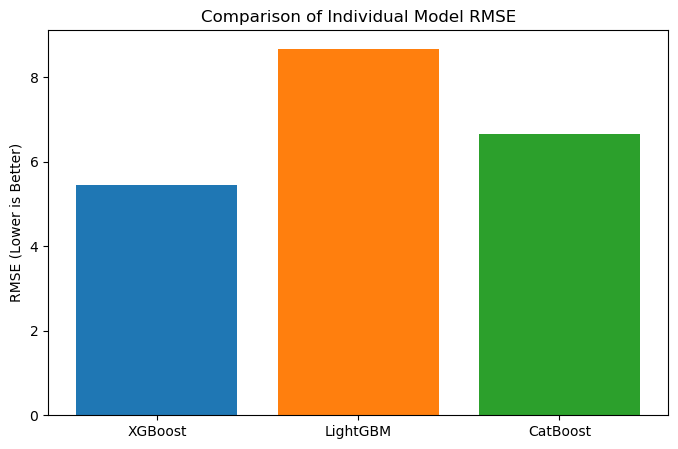

In [10]:
# Plot a bar chart to compare RMSE
plt.figure(figsize=(8, 5))
models = ['XGBoost', 'LightGBM', 'CatBoost']
rmse_values = [best_xgb_rmse, best_lgbm_rmse, best_cat_rmse]
plt.bar(models, rmse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Comparison of Individual Model RMSE')
plt.ylabel('RMSE (Lower is Better)')
plt.show()